<a href="https://colab.research.google.com/github/harshvns/IndiaStockSnap/blob/main/IndiaStockSnap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Long Short Term Memory(LSTM) based - Stock predicition


Aim -to predict the Opening stock price using past 60 day stock price.



In [ ]:
import math
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

## Data prep

Works on Yahoo based data.

In [ ]:
ticker = 'TATAMOTORS.NS'

In [ ]:
df = yf.download(ticker, start="2015-01-01", end=pd.Timestamp.today().strftime('%Y-%m-%d'))
print(df.tail())

/tmp/ipython-input-4183106198.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2015-01-01", end=pd.Timestamp.today().strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed

Price              Close          High           Low          Open  \
Ticker     TATAMOTORS.NS TATAMOTORS.NS TATAMOTORS.NS TATAMOTORS.NS   
Date                                                                 
2025-08-25    686.799988    688.900024    680.299988    683.750000   
2025-08-26    681.650024    686.950012    678.299988    686.799988   
2025-08-27    681.650024    681.650024    681.650024    681.650024   
2025-08-28    675.450012    680.900024    667.799988    679.900024   
2025-08-29    669.000000    681.150024    668.000000    675.450012   

Price             Volume  
Ticker     TATAMOTORS.NS  
Date                      
2025-08-25       6429311  
2025-08-26       7496633  
2025-08-27             0  
2025-08-28       9466045  
2025-08-29       8201917  


In [ ]:
df.shape

(2633, 5)

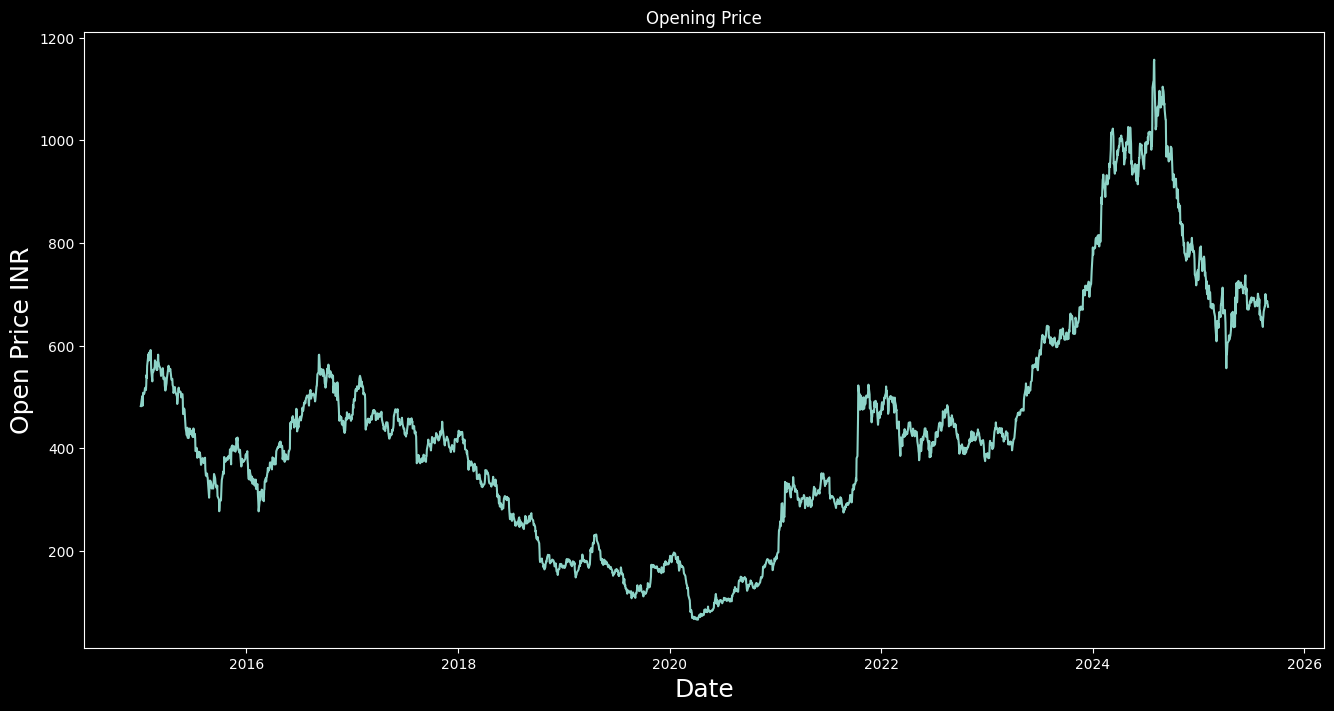

In [ ]:
#Ploting the received data from Yahoo finance
plt.style.use('dark_background')
plt.figure(figsize=(16,8))
plt.title('Opening Price')
plt.plot(df['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price INR', fontsize=18)
plt.show()

In [ ]:
data = df.filter(like='Open')
print(data.head())

#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len

Price               Open
Ticker     TATAMOTORS.NS
Date                    
2015-01-01    481.891621
2015-01-02    484.571497
2015-01-05    497.093849
2015-01-06    501.235554
2015-01-07    482.378878


2107

In [ ]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)



In [ ]:
#Create training dataset
#Create scaled training dataset

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.3814528 , 0.38390796, 0.3953803 , 0.39917472, 0.3818992 ,
       0.38993429, 0.40533489, 0.40287971, 0.40453135, 0.40555811,
       0.4116291 , 0.41412884, 0.41002207, 0.42095875, 0.43711822,
       0.43158293, 0.45332237, 0.47211555, 0.47474931, 0.463143  ,
       0.47689195, 0.46475003, 0.47354401, 0.4815791 , 0.467607  ,
       0.44622463, 0.43100262, 0.42564588, 0.44618009, 0.44189458,
       0.44234105, 0.4479656 , 0.45126897, 0.46314303, 0.45733989,
       0.45957189, 0.45510793, 0.4459122 , 0.44894776, 0.4462247 ,
       0.47332079, 0.46001832, 0.45912554, 0.45421517, 0.44975122,
       0.44698359, 0.44082334, 0.43537733, 0.44497474, 0.43908234,
       0.44350163, 0.44917094, 0.44439448, 0.43006518, 0.42926173,
       0.43260961, 0.41805716, 0.41395032, 0.40926316, 0.41926244])]
[np.float64(0.4222086473346068)]



In [ ]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2047, 60, 1)

## Model training

In [ ]:
#Build LSTM model
model=Sequential()
#Add first layer to model
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#Add second layer to model
model.add(LSTM(50, return_sequences=False))
#Add Dense Layer to model with 25 neurons
model.add(Dense(25))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=3)

Epoch 1/3
2047/2047 ━━━━━━━━━━━━━━━━━━━━ 70s 33ms/step - loss: 0.0011
Epoch 2/3
2047/2047 ━━━━━━━━━━━━━━━━━━━━ 69s 26ms/step - loss: 2.5070e-04
Epoch 3/3
2047/2047 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - loss: 1.9380e-04


## Testing and Validating model

In [ ]:
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-60: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])



In [ ]:
#Convert the data to a numpy array

x_test=np.array(x_test)


In [ ]:
#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))


In [ ]:
#Get the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


In [ ]:
#Get root mean squared error(RMSE)

rmse =np.sqrt(np.mean(predictions-y_test)**2)
rmse



np.float64(3.8951729265927377)

/tmp/ipython-input-4000082002.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


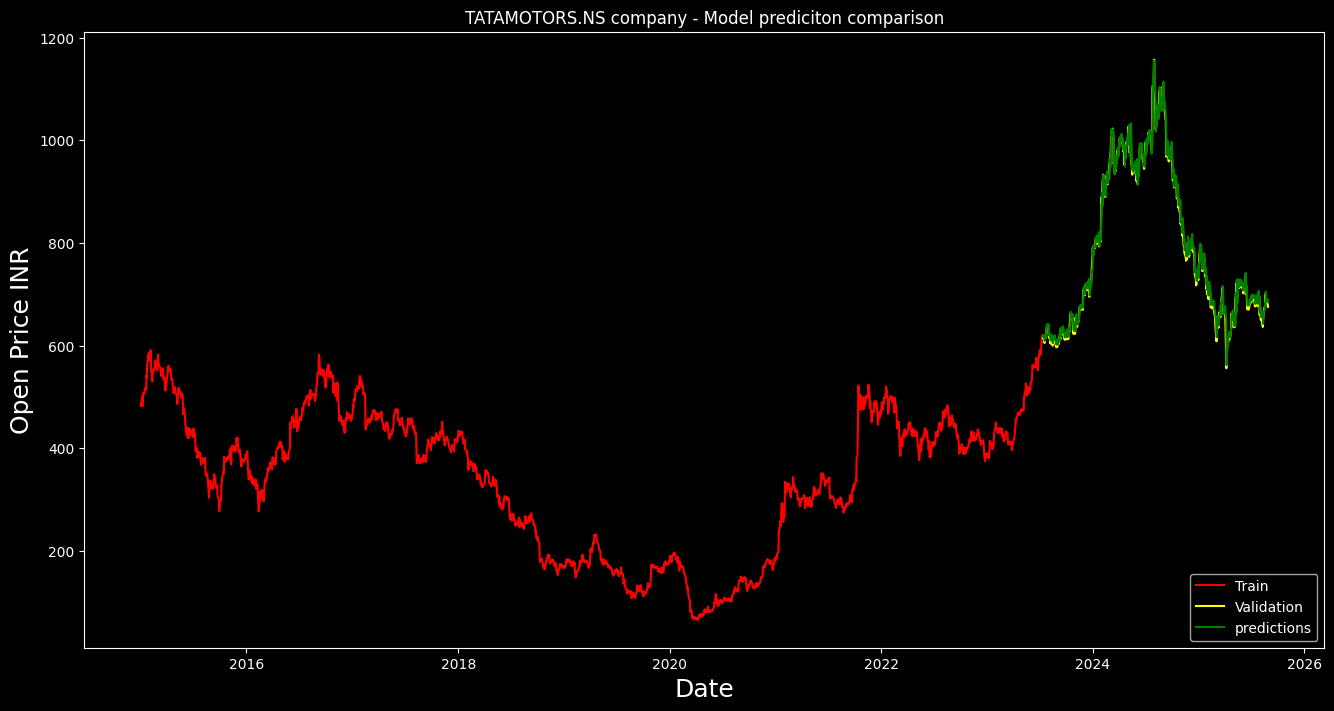

In [ ]:
#plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.style.use('dark_background')
plt.figure(figsize=(16,8))
plt.title(f'{ticker} company - Model prediciton comparison')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price INR', fontsize=18)
plt.plot(train['Open'] , color='red')
plt.plot(valid['Open'] , color='yellow')
plt.plot(valid[ 'predictions'] , color='green')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
plt.savefig('/content/prediction.png')
plt.show()


In [ ]:
#Show the valid and predicted prices

valid.tail(15)

Price,Open,predictions
Ticker,TATAMOTORS.NS,
Date,,
2025-08-08,647.950012,656.873535
2025-08-11,636.200012,654.600281
2025-08-12,651.099976,642.361694
2025-08-13,657.200012,658.087646
2025-08-14,666.000000,663.681458
2025-08-18,677.000000,671.982483
2025-08-19,676.750000,682.257935
2025-08-20,700.250000,680.712280


# Getting predicitions - for tomorrow

In [ ]:
#Get the quote
stock_quote = yf.download(ticker, start="2015-01-01", end=pd.Timestamp.today().strftime('%Y-%m-%d'))

new_df=stock_quote.filter(like='Open')
#Get last 60 days values and convert into array
last_60_days=new_df[-60:].values

#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)

#Create an empty list
X_test=[]
#Appemd the past 60days
X_test.append(last_60_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(f'Opening Price of {ticker} tomorrow:{pred_price}')

/tmp/ipython-input-2558683260.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_quote = yf.download(ticker, start="2015-01-01", end=pd.Timestamp.today().strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Opening Price of TATAMOTORS.NS tomorrow:[[680.53235]]
